In [ ]:
import pandas as p

In [ ]:
d=p.read_csv("Vinhos.csv")

In [ ]:
d.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import Ridge,Lasso

### Regressão linear múltipla

In [ ]:
y= d['sulphates']
X = d[['alcohol','total sulfur dioxide','fixed acidity','volatile acidity','residual sugar','chlorides','pH','quality','free sulfur dioxide','density','citric acid']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Erro quadrático médio:", mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinação (R^2):", r2)
X_train_sm = sm.add_constant(X_train_scaled)
modelo_sm = sm.OLS(y_train, X_train_sm)
resultado = modelo_sm.fit()
print("\nP-valor médio dos coeficientes:")
resultado.pvalues.mean()

Erro quadrático médio: 0.02241514744758501
Coeficiente de determinação (R^2): 0.26981684945311046

P-valor médio dos coeficientes:


0.06688159368033884

### Lasso

In [ ]:
y = d['total sulfur dioxide']
X = d[['sulphates', 'free sulfur dioxide', 'quality', 'density', 'citric acid', 'residual sugar', 'fixed acidity', 'alcohol', 'chlorides', 'pH', 'volatile acidity']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lasso_model = Lasso(alpha=0.0001)
lasso_model.fit(X_train_scaled, y_train)
y_pred = lasso_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Erro quadrático médio:", mse)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinação (R^2):", r2)
X_train_scaled_sm = sm.add_constant(X_train_scaled)
lasso_model_sm = sm.OLS(y_train, X_train_scaled_sm)
resultado = lasso_model_sm.fit()
print("\nP-valor médio dos coeficientes:")
print(resultado.pvalues.mean())

Erro quadrático médio: 658.3676513577628
Coeficiente de determinação (R^2): 0.5133549242228483

P-valor médio dos coeficientes:
0.09341998432822252


### Ridge

In [ ]:
y = d['total sulfur dioxide']
X = d[['quality', 'free sulfur dioxide', 'pH', 'density', 'citric acid', 'residual sugar', 'alcohol', 'sulphates', 'chlorides', 'fixed acidity', 'volatile acidity']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
ridge_model = Ridge(alpha=0.99)
ridge_model.fit(X_train_scaled, y_train)
y_pred = ridge_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Erro quadrático médio:", mse)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinação (R^2):", r2)
X_train_scaled_sm = sm.add_constant(X_train_scaled)
ridge_model_sm = sm.OLS(y_train, X_train_scaled_sm)
resultado = ridge_model_sm.fit()
print("\nP-valor médio dos coeficientes:")
print(resultado.pvalues.mean())

Erro quadrático médio: 658.3988612094365
Coeficiente de determinação (R^2): 0.5133318548624365

P-valor médio dos coeficientes:
0.0934199843282233


### Tensorflow

In [ ]:
from sklearn.metrics import r2_score
import tensorflow as tf
normalizador = StandardScaler()
d[['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates','alcohol','quality']] = normalizador.fit_transform(d[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates', 'alcohol', 'quality']])
y= d['total sulfur dioxide']
X = d[['sulphates','free sulfur dioxide','pH','alcohol','citric acid','residual sugar','density','quality','chlorides','fixed acidity','volatile acidity']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1028, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared on Test Set:", r2)
X_train_sm = sm.add_constant(X_train_scaled)
modelo_sm = sm.OLS(y_train, X_train_sm)
resultado = modelo_sm.fit()
print("\nP-valor médio dos coeficientes:")
resultado.pvalues.mean()

Epoch 1/100
10/10 [==============================] - 2s 39ms/step - loss: 0.6718 - val_loss: 0.4418
Epoch 2/100
10/10 [==============================] - 0s 20ms/step - loss: 0.4078 - val_loss: 0.3568
Epoch 3/100
10/10 [==============================] - 0s 21ms/step - loss: 0.3155 - val_loss: 0.5047
Epoch 4/100
10/10 [==============================] - 0s 20ms/step - loss: 0.3109 - val_loss: 0.3101
Epoch 5/100
10/10 [==============================] - 0s 21ms/step - loss: 0.2576 - val_loss: 0.3408
Epoch 6/100
10/10 [==============================] - 0s 20ms/step - loss: 0.2270 - val_loss: 0.3067
Epoch 7/100
10/10 [==============================] - 0s 22ms/step - loss: 0.1905 - val_loss: 0.3000
Epoch 8/100
10/10 [==============================] - 0s 20ms/step - loss: 0.1555 - val_loss: 0.3241
Epoch 9/100
10/10 [==============================] - 0s 20ms/step - loss: 0.1411 - val_loss: 0.3010
Epoch 10/100
10/10 [==============================] - 0s 20ms/step - loss: 0.1334 - val_loss: 0.3173

0.14530998419610372

### Sklearn

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
normalizador = StandardScaler()
d[['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates','alcohol','quality']] = normalizador.fit_transform(d[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates', 'alcohol', 'quality']])
X = d[['quality', 'density', 'chlorides', 'alcohol', 'volatile acidity', 'sulphates', 'pH', 'fixed acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide']]
y = d['total sulfur dioxide']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = MLPRegressor(hidden_layer_sizes=(128, 256, 512,1028,64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print("R-squared on Test Set:", r2)
X_train_sm = sm.add_constant(X_train_scaled)
modelo_sm = sm.OLS(y_train, X_train_sm)
resultado = modelo_sm.fit()
print("\nP-valor médio dos coeficientes:")
resultado.pvalues.mean()

R-squared on Test Set: 0.6057596851046071

P-valor médio dos coeficientes:


0.1453099841960873

### KNN

In [3]:
import numpy as np
import pandas as pd
dados = pd.read_csv('Vinhos.csv')
dados.head()
from sklearn.preprocessing import StandardScaler
normalizador = StandardScaler()
dados[['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates','alcohol','quality']] = normalizador.fit_transform(dados[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates', 'alcohol', 'quality']])
y = dados['sulphates']
X = dados[['total sulfur dioxide','free sulfur dioxide','fixed acidity','quality','density','pH','alcohol','volatile acidity','citric acid','residual sugar','chlorides']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_pred = knn.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error (MSE): 0.7684420139892366
Mean Absolute Error (MAE): 0.5421834450275123
R^2 Score: 0.2738040706264664


In [ ]:
correlograma=d.corr()

In [ ]:
novo_correlograma=correlograma[(correlograma<0.2) & correlograma!=1 ]

In [ ]:
novo_correlograma

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,NaN,0.673157,NaN,NaN,NaN,NaN,0.681501,NaN,NaN,NaN,NaN,NaN
volatile acidity,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.221492,NaN,NaN,NaN,NaN
citric acid,0.673157,NaN,1.000000,NaN,0.245312,NaN,NaN,0.375243,NaN,0.331232,NaN,0.240821,NaN
residual sugar,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.380147,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,0.245312,NaN,1.000000,NaN,NaN,0.208901,NaN,0.374784,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,1.000000,0.661093,NaN,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,0.661093,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
density,0.681501,NaN,0.375243,0.380147,0.208901,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
pH,NaN,0.221492,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.225322,NaN,NaN
sulphates,NaN,NaN,0.331232,NaN,0.374784,NaN,NaN,NaN,NaN,1.000000,NaN,0.257710,NaN


In [ ]:
d['quality'].max()
linhas_qualidade_8 = d[d['quality'] == 8]

In [ ]:
linhas_qualidade_8

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
190,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8,267
197,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8,278
271,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8,390
310,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8,440
321,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8,455
340,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8,481
349,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,495
352,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,498
419,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,588
747,9.1,0.40,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8,1061


In [ ]:
a0=[]
for index, row in d.iterrows():
    if row['quality'] ==3:
        a0.append(row['alcohol'])
a1=[]
for index, row in d.iterrows():
    if row['quality'] == 4 or row['quality']==5:
        a1.append(row['alcohol'])
a2=[]
for index, row in d.iterrows():
    if row['quality'] == 6:
        a2.append(row['alcohol'])
a3=[]
for index, row in d.iterrows():
    if row['quality'] == 7:
        a3.append(row['alcohol'])
a4=[]
for index, row in d.iterrows():
    if row['quality'] == 8:
        a4.append(row['alcohol'])

In [ ]:
da0=p.DataFrame(a0)
print(da0.mean())
da0.count()
Ruim=da0.mean()

0    9.691667
dtype: float64


In [ ]:
da1=p.DataFrame(a1)
print(da1.mean())
da1.count()
Regular=da1.mean()

0    9.925194
dtype: float64


In [ ]:
da2=p.DataFrame(a2)
print(da2.mean())
da2.count()
Bom=da2.mean()

0    10.655339
dtype: float64


In [ ]:
da3=p.DataFrame(a3)
print(da3.mean())
da3.count()
Ótimo=da3.mean()

0    11.482634
dtype: float64


In [ ]:
da4=p.DataFrame(a4)
print(da4.mean())
da4.count()
Perfeito=da4.mean()

0    11.9375
dtype: float64


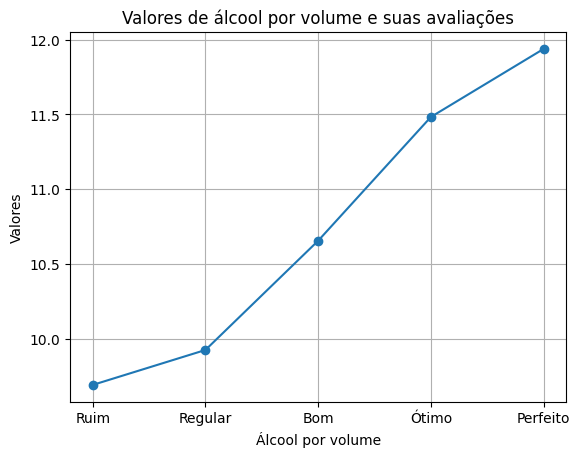

In [ ]:
import matplotlib.pyplot as plt
l = ['Ruim', 'Regular', 'Bom', 'Ótimo', 'Perfeito']
valores = [Ruim, Regular, Bom, Ótimo, Perfeito]
plt.plot(l, valores, marker='o')
plt.title('Valores de álcool por volume e suas avaliações')
plt.xlabel('Álcool por volume')
plt.ylabel('Valores')
plt.grid(True)
plt.show()

In [ ]:
l=[]
for index, row in d.iterrows():
    if row['citric acid'] <0.3:
        l.append(row['quality'])
l1=p.DataFrame(l)
l1.mean()
Ruim=l1.mean()
Ruim

0    5.456355
dtype: float64

In [ ]:
l=[]
for index, row in d.iterrows():
    if 0.4<row['citric acid'] <0.7:
        l.append(row['quality'])
l2=p.DataFrame(l)
l2.mean()
Regular=l2.mean()
Regular

0    5.912458
dtype: float64

In [ ]:
l=[]
for index, row in d.iterrows():
    if row['citric acid'] >0.7:
        l.append(row['quality'])
l3=p.DataFrame(l)
l3.mean()
Bom= l3.mean()
Bom

0    6.285714
dtype: float64

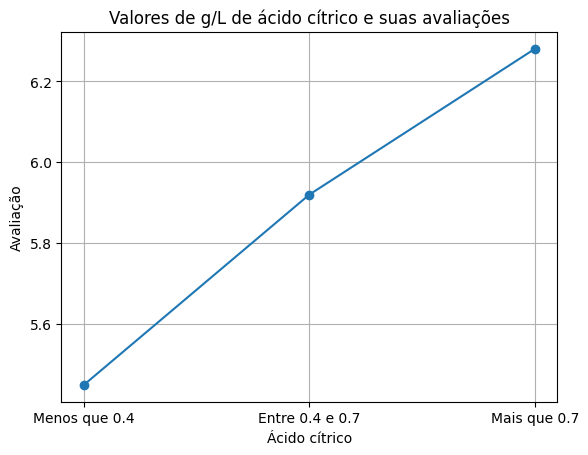

In [ ]:
import matplotlib.pyplot as plt
l = ['Menos que 0.4', 'Entre 0.4 e 0.7', 'Mais que 0.7']
valores = [5.45, 5.92, 6.28]
plt.plot(l, valores, marker='o')
plt.title('Valores de g/L de ácido cítrico e suas avaliações')
plt.xlabel('Ácido cítrico')
plt.ylabel('Avaliação')
plt.grid(True)
plt.show()

In [ ]:
l=[]
for index, row in d.iterrows():
    if row['sulphates'] <0.45:
        l.append(row['quality'])
l1=p.DataFrame(l)
l1.mean()
Ruim=l1.mean()
Ruim

0    5.1875
dtype: float64

In [ ]:
l=[]
for index, row in d.iterrows():
    if 0.5 <row['sulphates'] <0.8:
        l.append(row['quality'])
l1=p.DataFrame(l)
l1.mean()
Médio=l1.mean()
Médio

0    5.642689
dtype: float64

In [ ]:
l=[]
for index, row in d.iterrows():
    if row['sulphates'] >0.8:
        l.append(row['quality'])
l1=p.DataFrame(l)
l1.mean()
Bom=l1.mean()
Bom

0    6.055556
dtype: float64

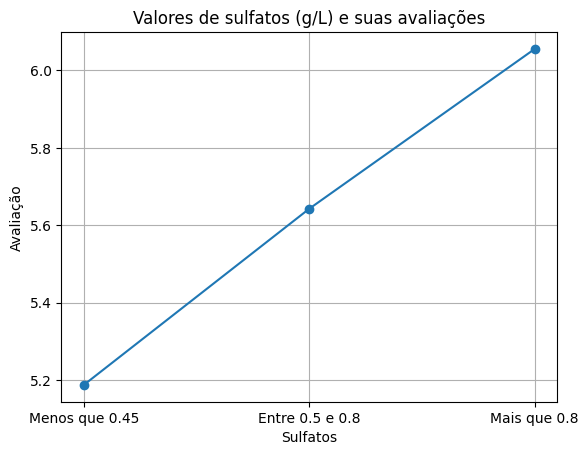

In [ ]:
import matplotlib.pyplot as plt
l = ['Menos que 0.45', 'Entre 0.5 e 0.8', 'Mais que 0.8']
valores = [Ruim, Médio, Bom]
plt.plot(l, valores, marker='o')
plt.title('Valores de sulfatos (g/L) e suas avaliações')
plt.xlabel('Sulfatos')
plt.ylabel('Avaliação')
plt.grid(True)
plt.show()